In [1]:
__author__ ="jimmy hdez"
__version__ = "1.0.2"

In [7]:
#importamos las bibliotecas 
import pandas as pd #pandas para la manipulación de datos,
import json #json para el tratamiento de objetos javascripts
import numpy as np  # soporte para crear vectores y matrices, tipos, funciones


In [18]:

file_path="data.csv"
df=pd.read_csv(file_path)
df.head()


,id,data
0,1,"{""id_dispositivo"":""dht11-01"",""microsegundos"":""..."
1,2,"{""id_dispositivo"":""dht11-01"",""microsegundos"":""..."
2,3,"{""id_dispositivo"":""dht11-01"",""microsegundos"":""..."
3,4,"{""id_dispositivo"":""dht11-01"",""microsegundos"":""..."
4,5,"{""id_dispositivo"":""dht11-01"",""microsegundos"":""..."


In [19]:
df["json_data"]=df["data"].apply(json.loads)
temperature_data=pd.json_normalize(df["json_data"])
temperature_data.head()

,id_dispositivo,microsegundos,fecha,timestamp,celcius,fahrenheit,humedad,ind_cal_cel,ind_cal_far
0,dht11-01,77515677,2023-8-15T18:37:10-0500,1692124630,26.10,78.98,46.00,25.97,78.74
1,dht11-01,83562512,2023-8-15T18:37:16-0500,1692124636,26.10,78.98,46.00,25.97,78.74
2,dht11-01,89609347,2023-8-15T18:37:22-0500,1692124642,,,46.00,25.97,78.74
3,dht11-01,95656202,2023-8-15T18:37:28-0500,1692124648,26.10,78.98,46.00,25.97,78.74
4,dht11-01,101703012,2023-8-15T18:37:34-0500,1692124654,26.10,78.98,46.00,25.97,78.74


In [20]:
temperature_data.replace('', np.nan,inplace=True)
temperature_data.isnull().sum()

id_dispositivo    0
microsegundos     0
fecha             0
timestamp         0
celcius           1
fahrenheit        1
humedad           0
ind_cal_cel       1
ind_cal_far       0
dtype: int64

In [70]:
temperature_data['fahrenheit'] = temperature_data['fahrenheit'].apply(lambda x: float(x) if x != '' else None)
temperature_data['ind_cal_cel'] = temperature_data['ind_cal_cel'].apply(lambda x: float(x) if x != '' else None)
#temperature_data['fecha']=pd.to_datetime(temperature_data['fecha'],format='%Y-%m-%d %H:%M:%S')
tempeture_data = temperature_data.astype({'id_dispositivo': 'str', 'microsegundos': 'int64',
                    'timestamp': 'int64','humedad':'float64','ind_cal_far':'float64'})
temperature_data.dtypes

id_dispositivo     object
microsegundos      object
fecha              object
timestamp          object
celcius            object
fahrenheit        float64
humedad            object
ind_cal_cel       float64
ind_cal_far        object
dtype: object

In [25]:
tempeture_data.head(3)

,id_dispositivo,microsegundos,fecha,timestamp,celcius,fahrenheit,humedad,ind_cal_cel,ind_cal_far
0,dht11-01,77515677,2023-8-15T18:37:10-0500,1692124630,26.10,78.98,46.0,25.97,78.74
1,dht11-01,83562512,2023-8-15T18:37:16-0500,1692124636,26.10,78.98,46.0,25.97,78.74
2,dht11-01,89609347,2023-8-15T18:37:22-0500,1692124642,NaN,NaN,46.0,25.97,78.74


In [267]:
#!pip install -U scikit-learn

In [26]:
from sklearn.impute import SimpleImputer,KNNImputer

In [27]:
simple=SimpleImputer(strategy='mean')
simple.fit(tempeture_data[["celcius"]])
tempeture_data["celcius"]=simple.transform(tempeture_data[["celcius"]])
#mean_strategy


In [28]:
knn=KNNImputer(n_neighbors=1)
imp_knn=knn.fit_transform(tempeture_data[["fahrenheit"]])
tempeture_data["fahrenheit"]=imp_knn

In [29]:
knn=KNNImputer(n_neighbors=2)
imp_ind=knn.fit_transform(tempeture_data[["ind_cal_cel","ind_cal_far"]])
imp_ind[0]
#tempeture_data["fahrenheit"]=imp_knn

array([25.97, 78.74])

In [75]:
tempeture_data.head(5)

,id_dispositivo,microsegundos,fecha,timestamp,celcius,fahrenheit,humedad,ind_cal_cel,ind_cal_far
0,dht11-01,77515677,2023-8-15T18:37:10-0500,1692124630,26.10,78.98,46.0,25.97,78.74
1,dht11-01,83562512,2023-8-15T18:37:16-0500,1692124636,26.10,78.98,46.0,25.97,78.74
2,dht11-01,89609347,2023-8-15T18:37:22-0500,1692124642,NaN,NaN,46.0,25.97,78.74
3,dht11-01,95656202,2023-8-15T18:37:28-0500,1692124648,26.10,78.98,46.0,25.97,78.74
4,dht11-01,101703012,2023-8-15T18:37:34-0500,1692124654,26.10,78.98,46.0,25.97,78.74


In [31]:
q_1=np.quantile(tempeture_data["celcius"],0.25)
q_3=np.quantile(tempeture_data["celcius"],0.75)
inf=q_1-1.5*(q_3-q_1)
inf

24.299999999999997

{'whiskers': [<matplotlib.lines.Line2D at 0x12072f100>,
 'caps': [<matplotlib.lines.Line2D at 0x12072f640>,
 'boxes': [<matplotlib.lines.Line2D at 0x12072dd20>],
 'medians': [<matplotlib.lines.Line2D at 0x12072fb80>],
 'fliers': [<matplotlib.lines.Line2D at 0x12072fe20>],
 'means': []}

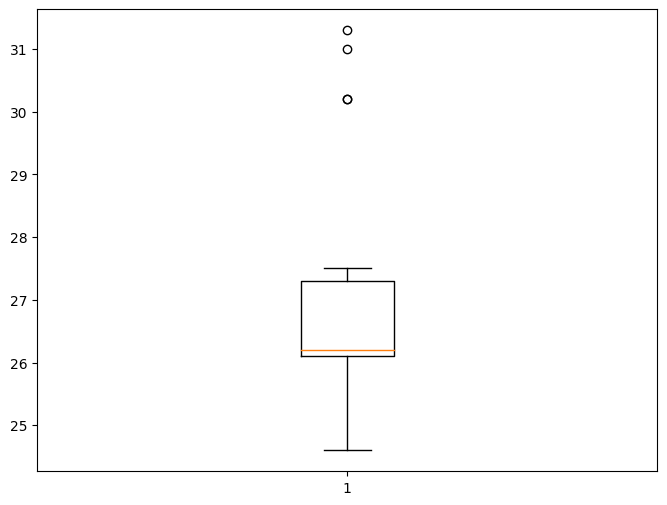

In [33]:
import matplotlib.pyplot  as plt
fig=plt.figure(figsize=(8,6))
plt.boxplot(tempeture_data["celcius"])

In [73]:
from sklearn.ensemble import IsolationForest
#from sklearn.model_selection import train_test_split


In [60]:
temp=tempeture_data.loc[:,["celcius","humedad"]]
temp_test=pd.DataFrame({"celcius":[30.2,26.1],"humedad":[89,46.0]})
temp_test

,celcius,humedad
0,30.2,89.0
1,26.1,46.0


In [74]:
isolation=IsolationForest(random_state=0).fit(temp)
isolation.predict(temp_test)
#isolation.decision_function(temp_test)


array([-1,  1])

In [ ]:
#X_train,X_test,y_train,y_test
temp_test,temp_train=train_test_split(tempeture_data["celcius"],test_size=0.7)
clf=IsolationForest().fit([temp_train])
clf.predict([temp_test])

In [72]:
pr=pd.DataFrame({"A":[["maria","juan"],"jorge"],"calumnos":[10,3]})
pr.explode(list('A'))
#df.groupby().agg('mean')

,A,calumnos
0,maria,10
0,juan,10
1,jorge,3
